# Multiple Linear Regression
## Bikesharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Numpy and Pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the data from csv

bs = pd.read_csv('day.csv')
bs

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# Shape of data

bs.shape

(730, 16)

In [5]:
# Info of data

bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Summary of data

bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Dropping columns and changing datatypes

- ``Instant`` is the index of each row and it doesn't add much information to the data. Hence, we can drop the column.
- ``dtedat`` is a Date column. We are not doing any Time series analysis and we have ``mnth`` and ``yr`` columns as well. Hence, we can drop the column.
- Adding up ``casual`` and ``registered`` columns will give ``cnt`` column. As they are not adding any unique information to the data and are redundant columns we can drop them.

In [7]:
# dropping columns

bs.drop(columns=['instant','dteday','casual','registered'], inplace=True)

In [8]:
# Inspecting the head of the data

bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


From above, ``season, yr, mnth, holiday, weekday, workingday`` and  ``weathersit`` are **Categorical** variables. ``temp, atemp, hum`` and ``windspeed`` are **Continuous** variables.

``season, mnth, weekday`` and ``weathersit`` are categorical variables of **int** datatype. While building a model, we need to create dummy variables for these columns. In order to create dummy variables, the variables should be of **Object** type. So let's change the datatypes of these variables.

In [9]:
# Changing datatypes

dt_list = ['season', 'mnth', 'weekday', 'weathersit']

bs[dt_list] = bs[dt_list].astype('object')

In [10]:
# Inspecting the datatypes of the columns

bs.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## Step 3: Visualising the Data

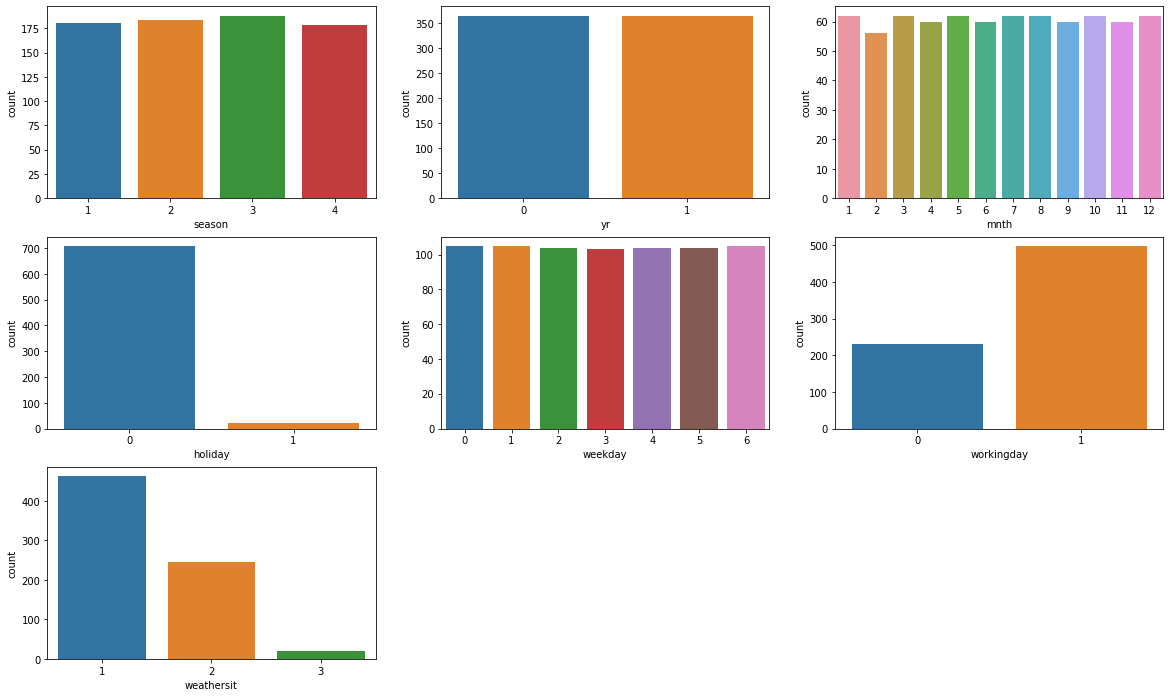

In [11]:
# Countplots for Categorical variables

cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(20,12))

for i in range(len(cat_vars)):
    plt.subplot(3,3,i+1)
    plt.xlabel(cat_vars[i])
    #bs[cont_vars[i]].value_counts(normalize=True).plot.bar()`
    sns.countplot(bs[cat_vars[i]])

From above plots, ``holiday`` and ``workingday`` variables are highly imbalanced variables which leads to biased results. So we may drop them.

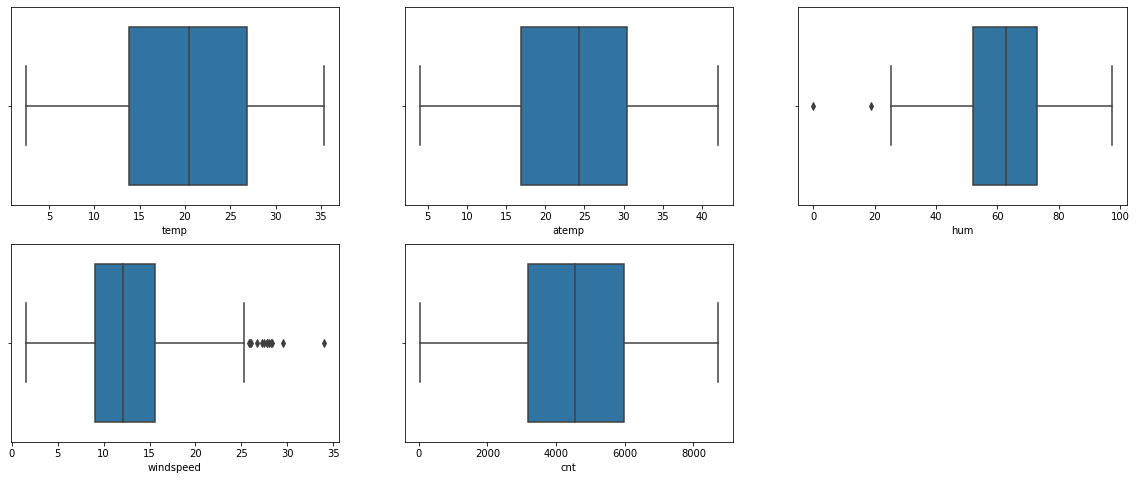

In [12]:
# Boxplots for Continuous variables

box_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(20,8))

for i in range(len(box_vars)):
    plt.subplot(2,3,i+1)
    sns.boxplot(bs[box_vars[i]])

From above plots, ``temp, atemp`` and ``cnt`` variables are well distributed with out Outliers.<br/> From ``hum`` boxplot, we can see a point at 0. In practical, 0 humidity is not possible. Hence, we can treat that as an outlier.<br/>From ``windspeed`` boxplot, there is a point at around 35 which is an extreme value and might impact our analysis. So it is imperative to treat the outlier.

In [13]:
# Method to plot Barplot for Categorical-Continuous variables

def bivariate_bar_plot(feature_name1, feature_name2):
    bs.groupby(feature_name1)[feature_name2].sum().plot.bar()

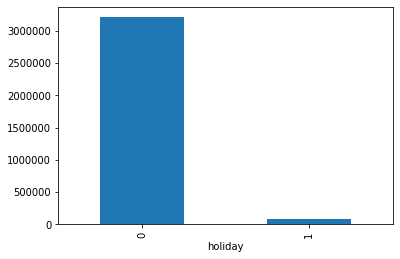

In [14]:
# Bar plot of holiday and cnt columns

bivariate_bar_plot('holiday', 'cnt')

The ``holiday`` column is a highly imbalanced column where only 21 records have 1's and rest are 0's. So it is obvious that the demand is huge on non holidays.

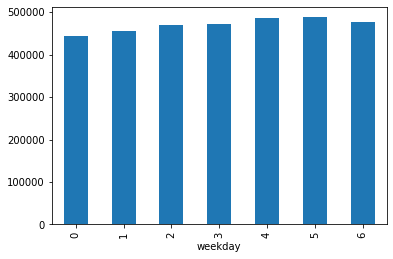

In [15]:
# Bar plot of weekday and cnt columns

bivariate_bar_plot('weekday', 'cnt')

There is no significant difference between the weekdays as the demand is almost same on all weekdays.

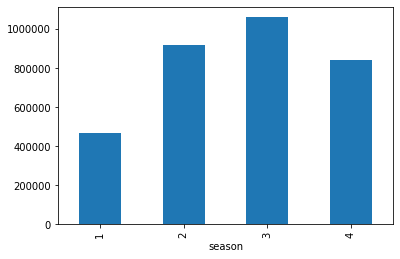

In [16]:
# Bar plot of season and cnt columns

bivariate_bar_plot('season', 'cnt')

From above plot, Fall is the most productive season of the year.

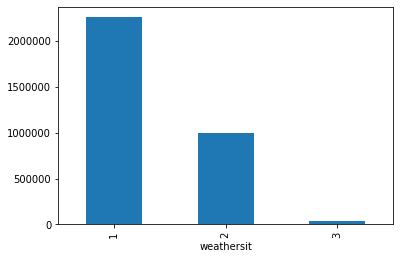

In [17]:
# Bar plot of weathersit and cnt columns

bivariate_bar_plot('weathersit', 'cnt')

From above plot, the demand is more when the weather is Clear/Cloudy

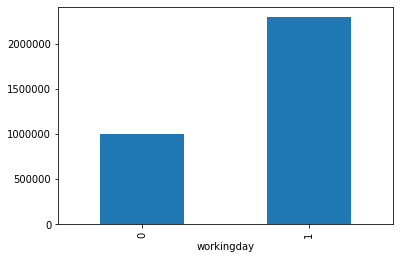

In [18]:
# Bar plot of workingday and cnt columns

bivariate_bar_plot('workingday', 'cnt')

The ``workingday`` column is a highly imbalanced column where 499 records have 1's and rest are 0's. So it is obvious that the demand is hign on workingdays.

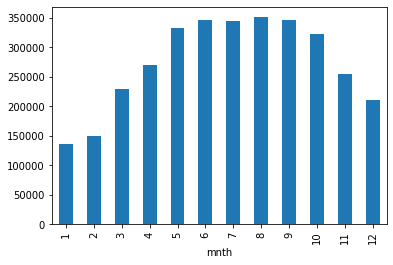

In [19]:
# Bar plot of mnth and cnt columns

bivariate_bar_plot('mnth', 'cnt')

From above plot, June to Sepetember are the most productive months of the year.

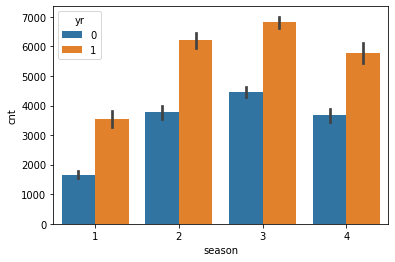

In [20]:
# Bar plot of yr and cnt for each season

sns.barplot('season', 'cnt', 'yr', data=bs)

From above plot, demand in 2019 is more than 2018 irrespective of season and **Fall** is the most productive season of the year.

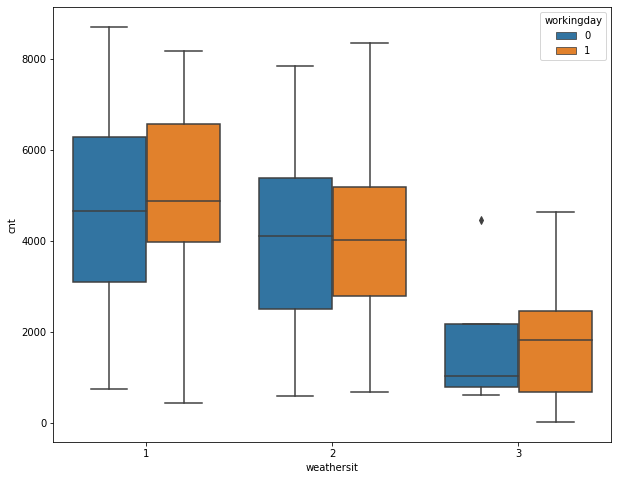

In [21]:
# Box plot of workingday and cnt for each weathersit

plt.figure(figsize=(10,8))
sns.boxplot('weathersit', 'cnt', hue='workingday', data=bs)

From above boxplot, there is no significant difference between the medians of ``workingday`` for weathersit_1 and weahtersit_2. But there is huge difference between medians for weahtersit_3 with an outlier.

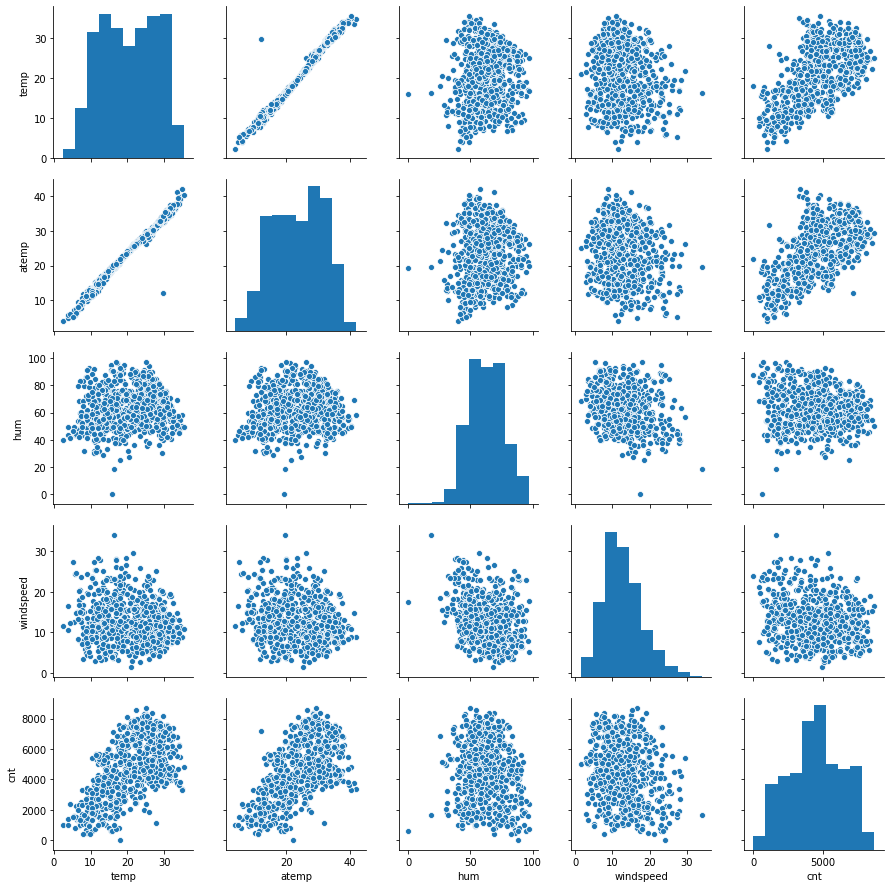

In [22]:
# Pairplot of Continuous variables.

sns.pairplot(bs[['temp', 'atemp', 'hum', 'windspeed','cnt']])

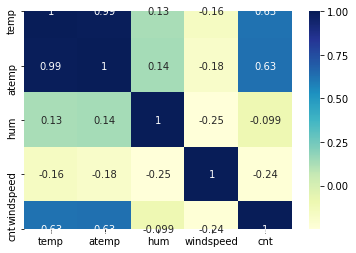

In [23]:
# heatmap of Continuous variables.

sns.heatmap(bs[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='YlGnBu')

From Pairplot and Heatmap, ``temp`` and ``atemp`` are highly correlated with each other and with target variable. Hence, we will use one of them while building the model to avoid multicollinearity.

## Step 4: Data preparation

In [24]:
# Replacing categorical values with their respective Categorical String values

bs['season'] = bs['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

bs['mnth'] = bs['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',
                            9:'September', 10:'October', 11:'November', 12:'December'})
bs['weekday'] = bs['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
bs['weathersit'] = bs['weathersit'].map({1:'Clear/Cloudy', 2:'Cloudy/Misty', 3:'Rainy/Snowy', 4:'Extreme/Unsuitable'}) 

In [25]:
# Creating dummy variables

dummy_list = ['season', 'mnth', 'weekday', 'weathersit']
dummy_variables = pd.get_dummies(bs[dummy_list], drop_first=True)
dummy_variables.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Adding dummy variables to dataframe and dropping original columns

bs = pd.concat([bs, dummy_variables], axis=1)
bs.drop(columns=dummy_list, inplace = True)
bs.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# Splitting the data

from sklearn.model_selection import train_test_split

bs_train, bs_test = train_test_split(bs, train_size = 0.7, random_state=100)

In [28]:
# Inspecting Train data

bs_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Inspecting Test data

bs_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
con_vars = ['temp', 'atemp', 'hum', 'windspeed']
bs_train[con_vars] = scaler.fit_transform(bs_train[con_vars])
bs_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,1,0


In [31]:
# Creating X and y

y_train = bs_train.pop('cnt')
X_train = bs_train

In [32]:
# Inspecting y_train

y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [33]:
# Inspecting X_train

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Step 5: Building a Linear Model

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_July', 'mnth_September', 'weekday_Saturday',
       'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy'],
      dtype='object')

### Building model using statsmodel for detailed summary of statistics
#### Model 1: Build model with all 15 variables
        ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_July', 'mnth_September', 'weekday_Saturday',
       'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']

In [37]:
# Importing statsmodel

import statsmodels.api as sm

In [38]:
# Method to add constant variable and run the model

def run_statsmodel(df):
    X_train_rfe = sm.add_constant(df)
    lm = sm.OLS(y_train,X_train_rfe).fit()
    return lm.summary(), lm

In [39]:
# Run the model on train dataset

col_1 = col
mod_1, lm_1 = run_statsmodel(X_train[col])
mod_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        19:06:00   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2211.4527    314.189      7.039      0.000    1594.141    2828.765
yr                       2003.7410     69.586     28.795      0.000    1867.019    2140.463
holiday                  -505.6380    233.674     -2.164      0.031    -964.755     -46.521
workingday                376.6676    100.130      3.762      0.000     179.935     573.400
temp                     4429.6085    298.555     14.837      0.000    3843.015    5016.202
hum                     -1358.5494    324.373     -4.188      0.000   -1995.871    -721.228
windspeed               -1618.9605    221.474     -7.310      0.000   -2054.108   -1183.813
season_Spring            -442.3970    179.551     -2.464      0.014    -795.176     -89.618
season_Summer             441.2212    128.897      3.423      0.001     187.966     694.476
season_Winter             810.9723    150.105      5.403      0.000     516.049    1105.895
mnth_January             -299.9787    150.791     -1.989      0.047    -596.250      -3.707
mnth_July                -459.9603    156.948     -2.931      0.004    -768.328    -151.592
mnth_September            707.4835    143.080      4.945      0.000     426.364     988.603
weekday_Saturday          465.4709    126.015      3.694      0.000     217.880     713.062
weathersit_Cloudy/Misty  -489.5196     90.004     -5.439      0.000    -666.357    -312.682
weathersit_Rainy/Snowy  -2150.9597    226.245     -9.507      0.000   -2595.482   -1706.438
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Method to calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [round(variance_inflation_factor(df.values, i),2) for i in range(df.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [41]:
# calculate the VIFs for the new model
VIF_1 = calculate_VIF(X_train[col])
VIF_1

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_Winter,3.46
7,season_Summer,2.85
13,weathersit_Cloudy/Misty,2.29
0,yr,2.09
12,weekday_Saturday,1.98


From Model 1, **_R-squared is 0.848_** and **_Adj. R-squared is 0.844._**

We have couple of variables with pretty high VIF's. Eventhough all p-values are less than 0.05 there are couple of variables with significant p-values.

Lets drop ``hum`` variable which has pretty high VIF and build a model with remaining 14 variables.

#### Model 2: Build a model with below 14 variables
        ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_July', 'mnth_September', 'weekday_Saturday',
       'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']

In [42]:
# Run the model on train dataset

col_2 = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
   'mnth_July', 'mnth_September', 'weekday_Saturday','weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']
mod_2, lm_2 = run_statsmodel(X_train[col_2])
mod_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.60e-188
Time:                        19:06:22   Log-Likelihood:                -4115.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1531.5352    273.457      5.601      0.000     994.256    2068.814
yr                       2037.9334     70.251     29.009      0.000    1899.906    2175.960
holiday                  -484.8749    237.492     -2.042      0.042    -951.492     -18.257
workingday                402.9488    101.589      3.966      0.000     203.350     602.547
temp                     4104.4221    293.059     14.005      0.000    3528.629    4680.215
windspeed               -1358.1595    216.062     -6.286      0.000   -1782.671    -933.648
season_Spring            -520.5502    181.538     -2.867      0.004    -877.231    -163.869
season_Summer             386.8528    130.367      2.967      0.003     130.711     642.994
season_Winter             681.1531    149.304      4.562      0.000     387.806     974.500
mnth_January             -340.6988    152.971     -2.227      0.026    -641.252     -40.146
mnth_July                -416.0975    159.193     -2.614      0.009    -728.875    -103.320
mnth_September            655.9879    144.913      4.527      0.000     371.268     940.708
weekday_Saturday          506.7844    127.710      3.968      0.000     255.864     757.705
weathersit_Cloudy/Misty  -706.3222     74.848     -9.437      0.000    -853.382    -559.263
weathersit_Rainy/Snowy  -2527.6314    211.042    -11.977      0.000   -2942.280   -2112.983
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# calculate the VIFs for the new model
VIF_2 = calculate_VIF(X_train[col_2])
VIF_2

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_Spring,3.07
6,season_Summer,2.34
0,yr,2.08
7,season_Winter,1.98
11,weekday_Saturday,1.97
8,mnth_January,1.62
9,mnth_July,1.59


From Model 2, **_R-squared is 0.843_** and **_Adj. R-squared is 0.838._**

We have couple of variables with high VIF's. Eventhough all p-values are less than 0.05 there are couple of variables with significant p-values.

Lets drop ``temp`` variable which has high VIF and build a model with remaining 13 variables.

#### Model 3: Build a model with below 13 variables
        ['yr', 'holiday', 'workingday', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_July', 'mnth_September', 'weekday_Saturday',
       'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']

In [44]:
# Run the model on train dataset

col_3 = ['yr', 'holiday', 'workingday', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
   'mnth_July', 'mnth_September', 'weekday_Saturday','weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']
mod_3, lm_3 = run_statsmodel(X_train[col_3])
mod_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.44e-154
Time:                        19:06:32   Log-Likelihood:                -4200.2
No. Observations:                 510   AIC:                             8428.
Df Residuals:                     496   BIC:                             8488.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4753.6830    174.487     27.244      0.000    4410.858    5096.508
yr                       2153.7591     82.351     26.153      0.000    1991.960    2315.559
holiday                  -492.6061    280.346     -1.757      0.080   -1043.419      58.206
workingday                415.5700    119.915      3.466      0.001     179.965     651.175
windspeed               -1632.2880    254.001     -6.426      0.000   -2131.338   -1133.238
season_Spring           -2261.6622    156.165    -14.483      0.000   -2568.489   -1954.836
season_Summer            -371.1476    140.003     -2.651      0.008    -646.220     -96.075
season_Winter            -662.2355    135.062     -4.903      0.000    -927.600    -396.871
mnth_January             -892.0141    174.493     -5.112      0.000   -1234.851    -549.178
mnth_July                 -82.8588    185.808     -0.446      0.656    -447.927     282.209
mnth_September            617.4099    171.031      3.610      0.000     281.376     953.444
weekday_Saturday          488.9222    150.747      3.243      0.001     192.741     785.104
weathersit_Cloudy/Misty  -766.3624     88.209     -8.688      0.000    -939.672    -593.052
weathersit_Rainy/Snowy  -2637.1615    248.953    -10.593      0.000   -3126.293   -2148.030
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# calculate the VIFs for the new model
VIF_3 = calculate_VIF(X_train[col_3])
VIF_3

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,season_Spring,2.97
5,season_Summer,2.29
6,season_Winter,1.98
0,yr,1.91
10,weekday_Saturday,1.69
7,mnth_January,1.60
11,weathersit_Cloudy/Misty,1.57
8,mnth_July,1.30


From Model 3, **_R-squared is 0.781_** and **_Adj. R-squared is 0.775._**

Even though the VIF's are in acceptable range, p-values for ``holiday`` and ``mnth_July`` are greater than 0.05.

There is also a significant dip in **R-squared** value. So while reporting our final model, we have to reinstate the ``temp`` variable to final model.

Lets drop ``holiday`` which has the highest p-value of 0.080 and build a model with remaining 12 variables. 

#### Model 4: Build a model with below 12 variables
        ['yr', 'workingday', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_July', 'mnth_September', 'weekday_Saturday',
       'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']

In [46]:
# Run the model on train dataset

col_4 = ['yr', 'workingday', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
   'mnth_July', 'mnth_September', 'weekday_Saturday','weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']
mod_4, lm_4 = run_statsmodel(X_train[col_4])
mod_4 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.41e-154
Time:                        19:06:33   Log-Likelihood:                -4201.7
No. Observations:                 510   AIC:                             8429.
Df Residuals:                     497   BIC:                             8485.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4684.6515    170.363     27.498      0.000    4349.930    5019.373
yr                       2155.3998     82.518     26.120      0.000    1993.272    2317.528
workingday                488.6150    112.715      4.335      0.000     267.158     710.072
windspeed               -1640.8436    254.487     -6.448      0.000   -2140.846   -1140.841
season_Spring           -2269.5981    156.427    -14.509      0.000   -2576.938   -1962.258
season_Summer            -368.4729    140.289     -2.627      0.009    -644.105     -92.841
season_Winter            -670.2408    135.269     -4.955      0.000    -936.010    -404.472
mnth_January             -897.1833    174.834     -5.132      0.000   -1240.689    -553.678
mnth_July                 -73.4186    186.120     -0.394      0.693    -439.098     292.261
mnth_September            600.6270    171.122      3.510      0.000     264.416     936.838
weekday_Saturday          562.8196    145.066      3.880      0.000     277.802     847.837
weathersit_Cloudy/Misty  -761.8488     88.357     -8.622      0.000    -935.448    -588.250
weathersit_Rainy/Snowy  -2626.9745    249.407    -10.533      0.000   -3116.997   -2136.952
==============================================================================
Omnibus:                       39.321   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.897
Skew:                          -0.456   Prob(JB):                     4.47e-18
Kurtosis:                       4.711   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# calculate the VIFs for the new model
VIF_4 = calculate_VIF(X_train[col_4])
VIF_4

,Features,VIF
2,windspeed,4.21
1,workingday,3.54
3,season_Spring,2.92
4,season_Summer,2.26
0,yr,1.91
5,season_Winter,1.91
9,weekday_Saturday,1.62
6,mnth_January,1.60
10,weathersit_Cloudy/Misty,1.57
7,mnth_July,1.29


From Model 4, **_R-squared of 0.779_** and **_Adj. R-squared is 0.774._**

VIFs are under check but``mnth_July`` variable which has high p-value.

Lets drop ``mnth_July`` build a model with remaining 11 variables.

#### Model 5: Build a model with below 11 variables
        ['yr', 'workingday', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_September', 'weekday_Saturday',
       'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']

In [48]:
# Run the model on train dataset

col_5 = ['yr', 'workingday', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_September', 'weekday_Saturday','weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']
mod_5, lm_5 = run_statsmodel(X_train[col_5])
mod_5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.01e-155
Time:                        19:06:34   Log-Likelihood:                -4201.8
No. Observations:                 510   AIC:                             8428.
Df Residuals:                     498   BIC:                             8478.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4656.3265    154.361     30.165      0.000    4353.048    4959.605
yr                       2155.6473     82.446     26.146      0.000    1993.662    2317.632
workingday                490.0045    112.565      4.353      0.000     268.844     711.165
windspeed               -1640.1344    254.265     -6.450      0.000   -2139.698   -1140.571
season_Spring           -2243.3484    141.447    -15.860      0.000   -2521.256   -1965.441
season_Summer            -342.4727    123.736     -2.768      0.006    -585.581     -99.364
season_Winter            -645.4682    119.706     -5.392      0.000    -880.658    -410.278
mnth_January             -897.4901    174.684     -5.138      0.000   -1240.699    -554.281
mnth_September            621.2273    162.820      3.815      0.000     301.328     941.127
weekday_Saturday          563.4063    144.935      3.887      0.000     278.647     848.166
weathersit_Cloudy/Misty  -759.5285     88.086     -8.623      0.000    -932.595    -586.462
weathersit_Rainy/Snowy  -2627.9759    249.183    -10.546      0.000   -3117.555   -2138.397
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# calculate the VIFs for the new model
VIF_5 = calculate_VIF(X_train[col_5])
VIF_5

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,season_Spring,2.65
4,season_Summer,2.00
0,yr,1.88
5,season_Winter,1.73
6,mnth_January,1.60
9,weathersit_Cloudy/Misty,1.57
8,weekday_Saturday,1.56
7,mnth_September,1.18


From Model 5, **_R-squared is 0.779_** and **_Adj. R-squared is 0.774._**

All p-values and VIF's are under acceptable limits.

From EDA we have seen that ``workingday`` is a highly imbalanced variable with high 1's (499 records). Lets drop this variable to prevent the model from giving biased results and build a model with 10 variables.

#### Model 6: Build a model with below 10 variables
        ['yr', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_September', 'weekday_Saturday', 'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']

In [50]:
# Run the model on train dataset

col_6 = ['yr', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
   'mnth_September', 'weekday_Saturday', 'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']
mod_6, lm_6 = run_statsmodel(X_train[col_6])
mod_6

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     167.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.57e-152
Time:                        19:06:34   Log-Likelihood:                -4211.3
No. Observations:                 510   AIC:                             8445.
Df Residuals:                     499   BIC:                             8491.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5055.4565    126.393     39.998      0.000    4807.129    5303.784
yr                       2160.7360     83.907     25.751      0.000    1995.881    2325.591
windspeed               -1658.1487    258.763     -6.408      0.000   -2166.548   -1149.749
season_Spring           -2266.9654    143.863    -15.758      0.000   -2549.617   -1984.314
season_Summer            -343.5707    125.941     -2.728      0.007    -591.011     -96.130
season_Winter            -683.7116    121.511     -5.627      0.000    -922.448    -444.975
mnth_January             -896.5537    177.798     -5.043      0.000   -1245.879    -547.229
mnth_September            621.5284    165.723      3.750      0.000     295.928     947.129
weekday_Saturday          172.2832    115.752      1.488      0.137     -55.137     399.704
weathersit_Cloudy/Misty  -732.0299     89.426     -8.186      0.000    -907.727    -556.333
weathersit_Rainy/Snowy  -2560.2853    253.130    -10.114      0.000   -3057.618   -2062.952
==============================================================================
Omnibus:                       44.100   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.695
Skew:                          -0.520   Prob(JB):                     1.49e-19
Kurtosis:                       4.731   Cond. No.                         8.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# calculate the VIFs for the new model
VIF_6 = calculate_VIF(X_train[col_6])
VIF_6

,Features,VIF
1,windspeed,3.55
2,season_Spring,2.57
3,season_Summer,1.87
0,yr,1.77
4,season_Winter,1.63
5,mnth_January,1.60
8,weathersit_Cloudy/Misty,1.52
7,weekday_Saturday,1.17
6,mnth_September,1.13
9,weathersit_Rainy/Snowy,1.08


From Model 6, **_R-squared is 0.771_** and **_Adj. R-squared is 0.766._**

All VIFs and p- values are under check.

We have witnessed a significant drop in R-squared of Model 3 when ``temp`` variable was dropped. Since it is a significant variable in explaining the target variable, lets add it back and build the model.

#### Model 7: Build a model with below 11 variables by adding temp variable
        ['yr', 'temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_September', 'weekday_Saturday', 'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']    

In [52]:
# Run the model on train dataset

col_7 = ['yr', 'temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_September', 'weekday_Saturday', 'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']
mod_7, lm_7 = run_statsmodel(X_train[col_7])
mod_7

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.00e-184
Time:                        19:06:34   Log-Likelihood:                -4133.1
No. Observations:                 510   AIC:                             8290.
Df Residuals:                     498   BIC:                             8341.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1783.5749    267.706      6.662      0.000    1257.602    2309.548
yr                       2048.8003     72.535     28.246      0.000    1906.288    2191.312
temp                     4001.8308    299.315     13.370      0.000    3413.754    4589.908
windspeed               -1387.3341    223.118     -6.218      0.000   -1825.702    -948.966
season_Spring            -452.6832    183.506     -2.467      0.014    -813.225     -92.141
season_Summer             510.5719    125.604      4.065      0.000     263.792     757.352
season_Winter             736.4671    148.895      4.946      0.000     443.927    1029.008
mnth_January             -360.3122    157.853     -2.283      0.023    -670.452     -50.172
mnth_September            750.6006    142.631      5.263      0.000     470.368    1030.833
weekday_Saturday          196.9698     99.411      1.981      0.048       1.652     392.287
weathersit_Cloudy/Misty  -663.6943     76.958     -8.624      0.000    -814.897    -512.491
weathersit_Rainy/Snowy  -2459.0870    217.491    -11.307      0.000   -2886.401   -2031.773
==============================================================================
Omnibus:                       81.548   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.920
Skew:                          -0.839   Prob(JB):                     9.48e-42
Kurtosis:                       5.464   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# calculate the VIFs for the new model
VIF_7 = calculate_VIF(X_train[col_7])
VIF_7

,Features,VIF
2,windspeed,4.63
1,temp,3.89
3,season_Spring,2.63
0,yr,2.07
4,season_Summer,1.91
5,season_Winter,1.63
6,mnth_January,1.60
9,weathersit_Cloudy/Misty,1.56
7,mnth_September,1.22
8,weekday_Saturday,1.19


From Model 7, **_R-squared is 0.831_** and **_Adj. R-squared is 0.828._**

All VIFs are under check. Even though all p-values are under check, we can still see some of them have a high p-value. ``weekday_Saturday`` for instance, has a high p-value of  ~0.05 and the demand on weekdays is almost equal on all days.

So lets drop this variable and build a model with remaining 10 variables.

#### Model 8: Build a model with below 10 variables
        ['yr', 'temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_September', 'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']

In [54]:
# Run the model on train dataset

col_8 = ['yr', 'temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_September', 'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']
mod_8, lm_8 = run_statsmodel(X_train[col_8])
mod_8

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          8.74e-185
Time:                        19:06:35   Log-Likelihood:                -4135.1
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1816.8467    267.961      6.780      0.000    1290.376    2343.318
yr                       2044.6183     72.716     28.118      0.000    1901.750    2187.486
temp                     3990.8157    300.140     13.297      0.000    3401.122    4580.509
windspeed               -1367.1427    223.537     -6.116      0.000   -1806.333    -927.953
season_Spring            -456.5125    184.033     -2.481      0.013    -818.088     -94.937
season_Summer             506.3493    125.954      4.020      0.000     258.884     753.815
season_Winter             736.1780    149.331      4.930      0.000     442.783    1029.573
mnth_January             -357.4926    158.309     -2.258      0.024    -668.527     -46.459
mnth_September            750.1035    143.048      5.244      0.000     469.053    1031.154
weathersit_Cloudy/Misty  -662.3512     77.181     -8.582      0.000    -813.990    -510.712
weathersit_Rainy/Snowy  -2453.0607    218.107    -11.247      0.000   -2881.581   -2024.540
==============================================================================
Omnibus:                       74.812   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.604
Skew:                          -0.761   Prob(JB):                     6.06e-40
Kurtosis:                       5.487   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# calculate the VIFs for the new model
VIF_8 = calculate_VIF(X_train[col_8])
VIF_8

,Features,VIF
2,windspeed,4.61
1,temp,3.85
3,season_Spring,2.62
0,yr,2.07
4,season_Summer,1.91
5,season_Winter,1.62
6,mnth_January,1.60
8,weathersit_Cloudy/Misty,1.56
7,mnth_September,1.22
9,weathersit_Rainy/Snowy,1.08


From Model 8, **_R-squared is 0.830_** and **_Adj. R-squared is 0.827._**

All VIFs are under check.

Even though all p-values are under check, we can still `mnth_January` has a p-value of 0.024. We should drop this variable as well.

#### Model 9 :Build a model with below 9 variables
        ['yr', 'temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_September', 'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']

In [56]:
# Run the model on train dataset

col_9 = ['yr', 'temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_September', 'weathersit_Cloudy/Misty', 'weathersit_Rainy/Snowy']
mod_9, lm_9 = run_statsmodel(X_train[col_9])
mod_9

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.51e-185
Time:                        19:06:35   Log-Likelihood:                -4137.7
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     500   BIC:                             8338.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1664.9816    260.446      6.393      0.000    1153.278    2176.685
yr                       2038.1554     72.957     27.936      0.000    1894.815    2181.496
temp                     4163.1779    291.460     14.284      0.000    3590.541    4735.815
windspeed               -1301.9217    222.570     -5.849      0.000   -1739.210    -864.633
season_Spring            -504.2103    183.565     -2.747      0.006    -864.864    -143.557
season_Summer             540.1225    125.575      4.301      0.000     293.404     786.841
season_Winter             796.7791    147.501      5.402      0.000     506.981    1086.577
mnth_September            758.3815    143.586      5.282      0.000     476.275    1040.488
weathersit_Cloudy/Misty  -670.1182     77.419     -8.656      0.000    -822.226    -518.011
weathersit_Rainy/Snowy  -2441.5933    218.940    -11.152      0.000   -2871.748   -2011.438
==============================================================================
Omnibus:                       73.466   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.169
Skew:                          -0.748   Prob(JB):                     3.38e-39
Kurtosis:                       5.470   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# calculate the VIFs for the new model
VIF_9 = calculate_VIF(X_train[col_9])
VIF_9

,Features,VIF
2,windspeed,4.59
1,temp,3.84
0,yr,2.07
3,season_Spring,1.98
4,season_Summer,1.90
5,season_Winter,1.61
7,weathersit_Cloudy/Misty,1.55
6,mnth_September,1.22
8,weathersit_Rainy/Snowy,1.08


From Model 9, **_R-squared is 0.828_** and **_Adj. R-squared is 0.825._**

Now as you can see, the VIFs and p-values both are within an acceptable range. So we will go ahead and make our predictions using **Model 9**.

## Step 6: Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms.

In [58]:
# predicting the values for train dataset

y_train_pred = lm_9.predict(sm.add_constant(X_train[col_9]))

Text(0.5, 1.0, 'Distribution of Error terms')

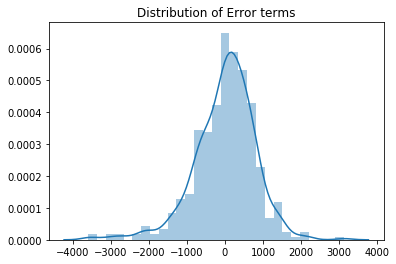

In [59]:
# Plot the histogram of the error terms

sns.distplot(y_train - y_train_pred)
plt.title("Distribution of Error terms")

From above plot we can see that error terms are normally distributes with mean centered at around 0.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. **Model 9**.

In [60]:
# Scaling test data
bs_test[con_vars] = scaler.transform(bs_test[con_vars])
bs_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,2659,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [61]:
# Creating X_test and y_test

y_test = bs_test.pop('cnt')
X_test = bs_test

In [62]:
# Inspecting y_test

y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [63]:
# Inspecting x_test

X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy/Misty,weathersit_Rainy/Snowy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
# prediction using X_test

y_pred = lm_9.predict(sm.add_constant(X_test[col_9]))

In [65]:
# R-squared for test data

from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_pred)
r2_test

0.8009599227555844

In [66]:
# adj R-squared for test data
n = X_test.shape[0]
p = X_test[col_9].shape[1]
adj_r2_test = 1-((1-r2_test)*(n-1)/(n-p-1))
adj_r2_test

0.7924296337308236

From above calculations, for test data **_R-squared is 0.801_** and **_Adj. R-squared is 0.792_.**

Text(0, 0.5, 'y_pred')

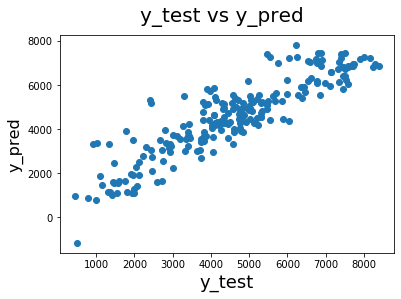

In [67]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

The equation of our best fitted line is:

$ cnt = 1664.98 + 2038.16  \times  yr + 4163.18  \times  temp - 1301.92 \times windspeed - 504.21 \times season_-Spring + 540.12 \times season_-Summer + 796.78 \times season_-Winter + 758.38 \times mnth_-September - 670.12 \times weathersit_-Cloudy/Misty - 2441.59 \times weathersit_-Rainy/Snowy $

- ``yr`` has very high coefficient because as we pass each year, the demand is increasing.
- ``temp`` has the highest coefficient as it is highly correlated with the target variable because demand varies based on the temperature on a given day.
- ``season_Spring`` has negative impact on target variable because of the weather of that particular season. We might have negative temperatures which is a major roadblock for demand.
- ``season_Summer`` will have clear, hot and sunny days where as ``season_Winter`` will have cool and ideal temperatures due to which the demand might be on the higher side which is evident for the coefficient.
- ``mnth_September`` is the first month of Fall season which is Summer to Winter transition where we find suitable weather due to which citizens may opt to come out of their home for their daily needs.
- ``windspeed, weathersit_Cloudy/Misty`` and ``weathersit_Rainy/Snowy`` have negative coefficients due to adverse/unsuitable weather because of which citizens might not opt to come out of their homes.